Завантажуємо метеорологічні дані в
1895-2022 роках з CSV-файлу в DataFrame.
Форматуємо для використання.

In [16]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

nyc = pd.read_csv('data.csv', skiprows=3)
nyc.columns = ['Date', 'Temperature']
print(nyc.head())


     Date  Temperature
0  189501         29.0
1  189601         27.7
2  189701         28.6
3  189801         33.1
4  189901         29.1


In [4]:
nyc.Date.dtype
nyc['Date'] = nyc['Date'] // 100
nyc.head()

Date  Temperature
0  1895         29.0
1  1896         27.7
2  1897         28.6
3  1898         33.1
4  1899         29.1

Обираємо показникі за період 1895-2018 років.


In [5]:
nyc_2018 = nyc[nyc['Date'] <= 2018]
nyc_2018.head()

Date  Temperature
0  1895         29.0
1  1896         27.7
2  1897         28.6
3  1898         33.1
4  1899         29.1

Представляємо графік за допомогою бібліотеки Seaborn у вигляді регресійної прямої.

(10.0, 70.0)

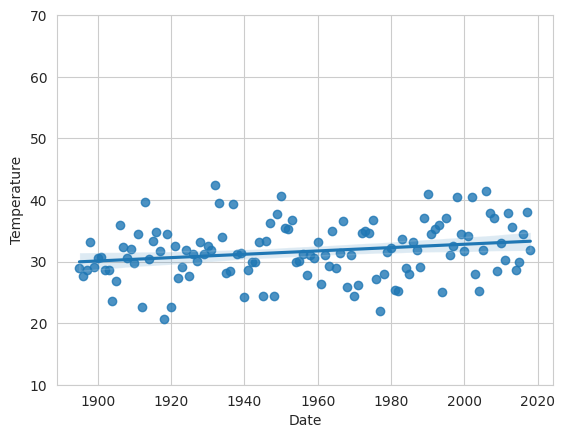

In [6]:

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_2018.Date, y=nyc_2018.Temperature)
axes.set_ylim(10, 70)


In [7]:
linear_regression = stats.linregress(x=nyc_2018.Date, y=nyc_2018.Temperature)
linear_regression.slope

0.02717230527143981

In [8]:
linear_regression.intercept

-21.536808811959084

Прогнозуємо дані на 2019, 2020, 2021 та 2022 рік, а також оцінюємо за формулою, якою могли б бути показники до 1895
року(1890, 1891, 1892, 1893 та 1894 роки).

In [9]:
from tabulate import tabulate
linear_regression = stats.linregress(x=nyc_2018.Date, y=nyc_2018.Temperature)
def forecast(x):
    return linear_regression.slope * x + linear_regression.intercept

years = [2019, 2020, 2021, 2022, 1890, 1891, 1892, 1893, 1894]
years = [ (y, forecast(y)) for y in years ]
years = pd.DataFrame(years, columns = ('Data', 'Temperature'))
years

Data  Temperature
0  2019    33.324076
1  2020    33.351248
2  2021    33.378420
3  2022    33.405592
4  1890    29.818848
5  1891    29.846020
6  1892    29.873193
7  1893    29.900365
8  1894    29.927537

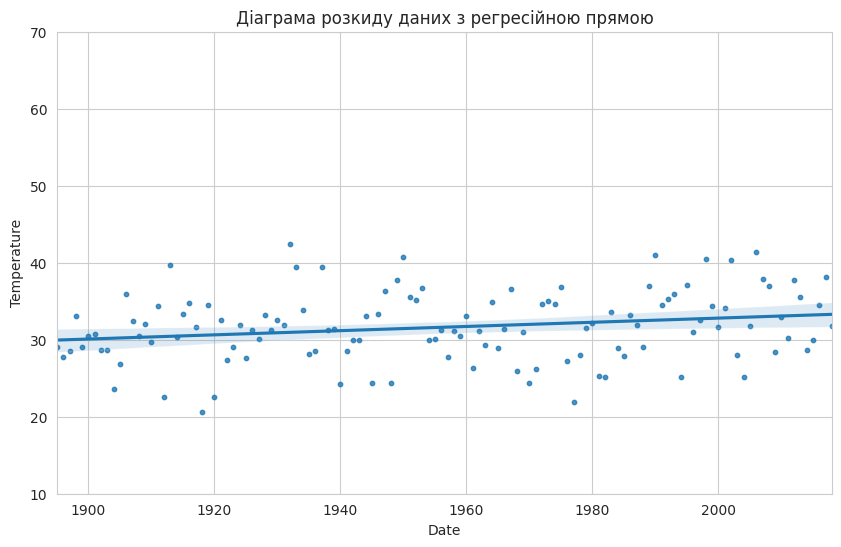

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Date', y='Temperature', data=nyc_2018, scatter_kws={"s": 10})
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Діаграма розкиду даних з регресійною прямою')

plt.xlim(min(nyc_2018['Date']), max(nyc_2018['Date']))
plt.ylim(10, 70)

plt.grid(True)
plt.show()
